In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("../evaluation.csv")

## RQ 1: Can LLM perform well in zero-shot setting?

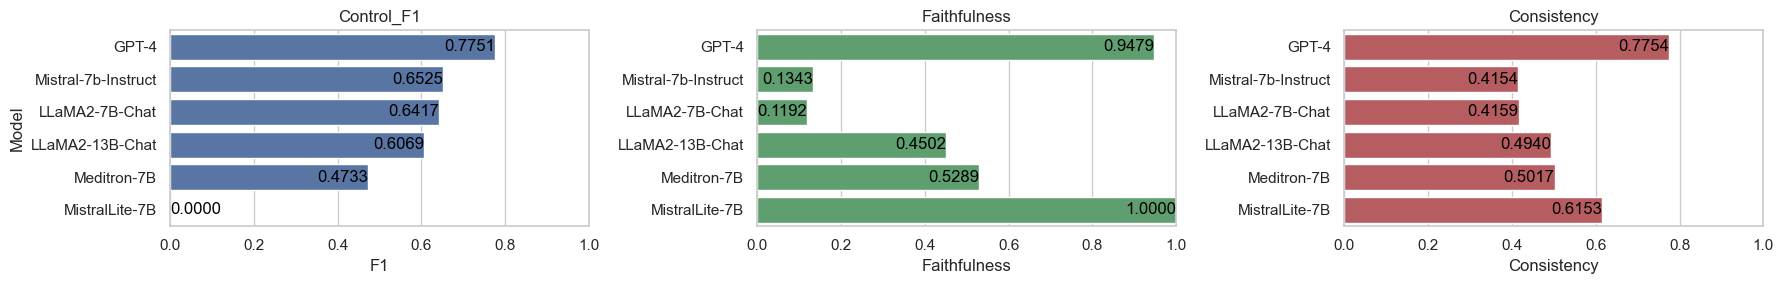

In [17]:
df_rq1 = df[(df["k shot"] == 0) & (df["Explicit Evidence"] == "no") & (df["CoT"] == "no") & (df["Fine tune"].isna())].sort_values(["Control_F1"], ascending=False)

plt.figure(figsize=(18, 3))

# Set the plotting style
sns.set(style="whitegrid")

# Plot Control_F1
ax1 = plt.subplot(1, 3, 1)
sns.barplot(x='Control_F1', y='Model', data=df_rq1, color="b", ax=ax1)
ax1.set_title('Control_F1')
ax1.set_xlabel('F1')
ax1.set_ylabel('')
ax1.set_xlim(0, 1)

# Display values inside the bar or on the right side if zero
for i, v in enumerate(df_rq1["Control_F1"]):
    if v != 0:
        ax1.annotate(f'{v:.4f}', (v, i), color='black', ha="right", va="center")
    else:
        ax1.annotate(f'{v:.4f}', (v, i), color='black', ha="left", va="center")

# Plot Faithfulness
ax2 = plt.subplot(1, 3, 2)
sns.barplot(x='Faithfulness', y='Model', data=df_rq1, color="g", ax=ax2)
ax2.set_title('Faithfulness')
ax2.set_xlabel('Faithfulness')
ax2.set_ylabel('')
ax2.set_xlim(0, 1)

# Display values inside the bar or on the right side if zero
for i, v in enumerate(df_rq1["Faithfulness"]):
    if v != 0:
        ax2.annotate(f'{v:.4f}', (v, i), color='black', ha="right", va="center")
    else:
        ax2.annotate(f'{v:.4f}', (v, i), color='black', ha="left", va="center")

# Plot Consistency
ax3 = plt.subplot(1, 3, 3)
sns.barplot(x='Consistency', y='Model', data=df_rq1, color="r", ax=ax3)
ax3.set_title('Consistency')
ax3.set_xlabel('Consistency')
ax3.set_ylabel('')
ax3.set_xlim(0, 1)

# Display values inside the bar or on the right side if zero
for i, v in enumerate(df_rq1["Consistency"]):
    if v != 0:
        ax3.annotate(f'{v:.4f}', (v, i), color='black', ha="right", va="center")
    else:
        ax3.annotate(f'{v:.4f}', (v, i), color='black', ha="left", va="center")

plt.tight_layout()
plt.show()

## RQ 2: Can relatively smaller LLMs compete with GPT-4 without fine-tuning?

### RQ 2.1: Can few-shot In-Context Learning setting improve the performance of LLMs? (Bonus: Is relevant ICL examples better than random examples?)

/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/1879912324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21["In Context Learning Examples"] = df_rq21.apply(lambda row: f"{row['Retriever']}: {row['k shot']}-shot" if pd.notna(row['Retriever']) else f"{row['k shot']}-shot", axis=1)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/1879912324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21['Model'] = pd.Categorical(df_rq21['Model'], categories=model_order, 

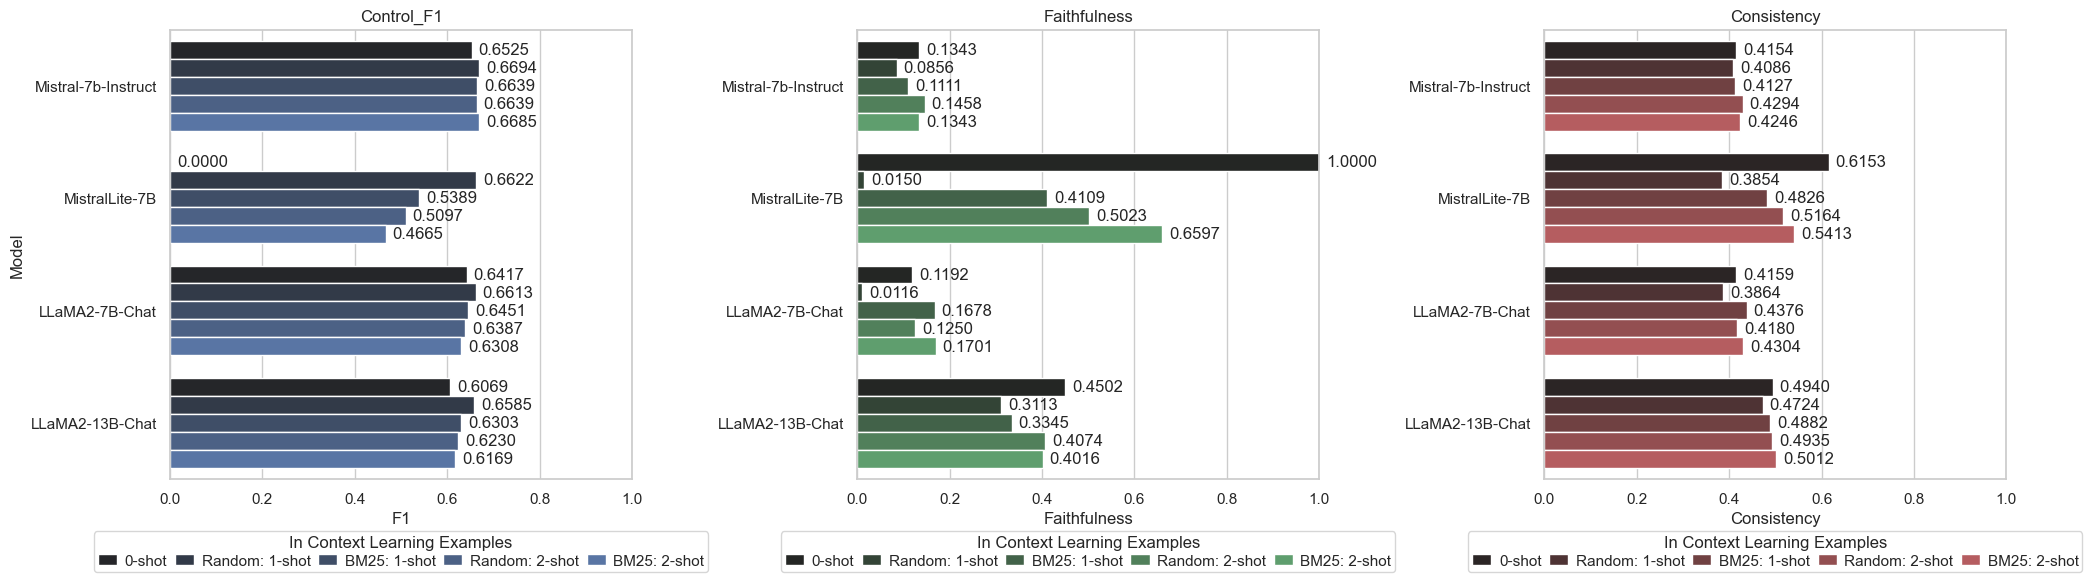

In [71]:
model_order = ["Mistral-7b-Instruct", "MistralLite-7B", "LLaMA2-7B-Chat", "LLaMA2-13B-Chat"]
df_rq21 = df[(df["k shot"] >= 0) & ((df["Fusion Strategy"] == "Early") | df["Fusion Strategy"].isna()) & (df["Explicit Evidence"] == "no") & (df["CoT"] == "no") & (df["Fine tune"].isna()) & (df["Model"].isin(model_order))]
df_rq21["In Context Learning Examples"] = df_rq21.apply(lambda row: f"{row['Retriever']}: {row['k shot']}-shot" if pd.notna(row['Retriever']) else f"{row['k shot']}-shot", axis=1)

df_rq21['Model'] = pd.Categorical(df_rq21['Model'], categories=model_order, ordered=True)
icl_order = ["0-shot", "Random: 1-shot", "BM25: 1-shot", "Random: 2-shot", "BM25: 2-shot"]
df_rq21['In Context Learning Examples'] = pd.Categorical(df_rq21['In Context Learning Examples'], categories=icl_order, ordered=True)
# print(df_rq21[["Model", "In Context Learning Examples", "Control_F1", "Faithfulness", "Consistency"]])

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot Control_F1
sns.barplot(x='Control_F1', y='Model', hue='In Context Learning Examples', data=df_rq21, ax=axs[0], orient='h', color="b")
axs[0].set_title('Control_F1')
axs[0].set_xlabel('F1')
axs[0].set_ylabel('Model')
axs[0].set_xlim(0, 1)

# Plot Faithfulness
sns.barplot(x='Faithfulness', y='Model', hue='In Context Learning Examples', data=df_rq21, ax=axs[1], orient='h', color="g")
axs[1].set_title('Faithfulness')
axs[1].set_xlabel('Faithfulness')
axs[1].set_ylabel('')
axs[1].set_xlim(0, 1)

# Plot Consistency
sns.barplot(x='Consistency', y='Model', hue='In Context Learning Examples', data=df_rq21, ax=axs[2], orient='h', color="r")
axs[2].set_title('Consistency')
axs[2].set_xlabel('Consistency')
axs[2].set_ylabel('')
axs[2].set_xlim(0, 1)

# Display values outside the bar
for ax in axs:
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, handlelength=1.25, borderpad=0.25, labelspacing=0.25, columnspacing=0.5, handletextpad=0.5, title="In Context Learning Examples")
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x() + width, p.get_y() + height * 3 / 4
        if x == y == 0: continue
        ax.annotate(f'{width:.4f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

### RQ 2.2: Does increase the number of shots improve the performance of LLMs? (1 vs 2 vs Late fusion)

/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/650898679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21["In Context Learning Examples"] = df_rq21.apply(lambda row: f"{row['Retriever']}: {row['k shot']}-shot ({row['Fusion Strategy']})" if pd.notna(row['Retriever']) else f"{row['k shot']}-shot", axis=1)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/650898679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21['Model'] = pd.Categorical(df_rq21['Model'],

1                     0-shot
42                    0-shot
47                    0-shot
49                    0-shot
55      BM25: 1-shot (Early)
57      BM25: 1-shot (Early)
58    Random: 1-shot (Early)
59      BM25: 1-shot (Early)
60      BM25: 1-shot (Early)
61    Random: 1-shot (Early)
62    Random: 1-shot (Early)
63    Random: 1-shot (Early)
65      BM25: 2-shot (Early)
72    Random: 2-shot (Early)
77    Random: 2-shot (Early)
78      BM25: 2-shot (Early)
79       BM25: 2-shot (Late)
80       BM25: 2-shot (Late)
81       BM25: 2-shot (Late)
82      BM25: 2-shot (Early)
85    Random: 2-shot (Early)
86      BM25: 2-shot (Early)
87    Random: 2-shot (Early)
88       BM25: 2-shot (Late)
89       BM25: 4-shot (Late)
93       BM25: 4-shot (Late)
94       BM25: 4-shot (Late)
Name: In Context Learning Examples, dtype: object


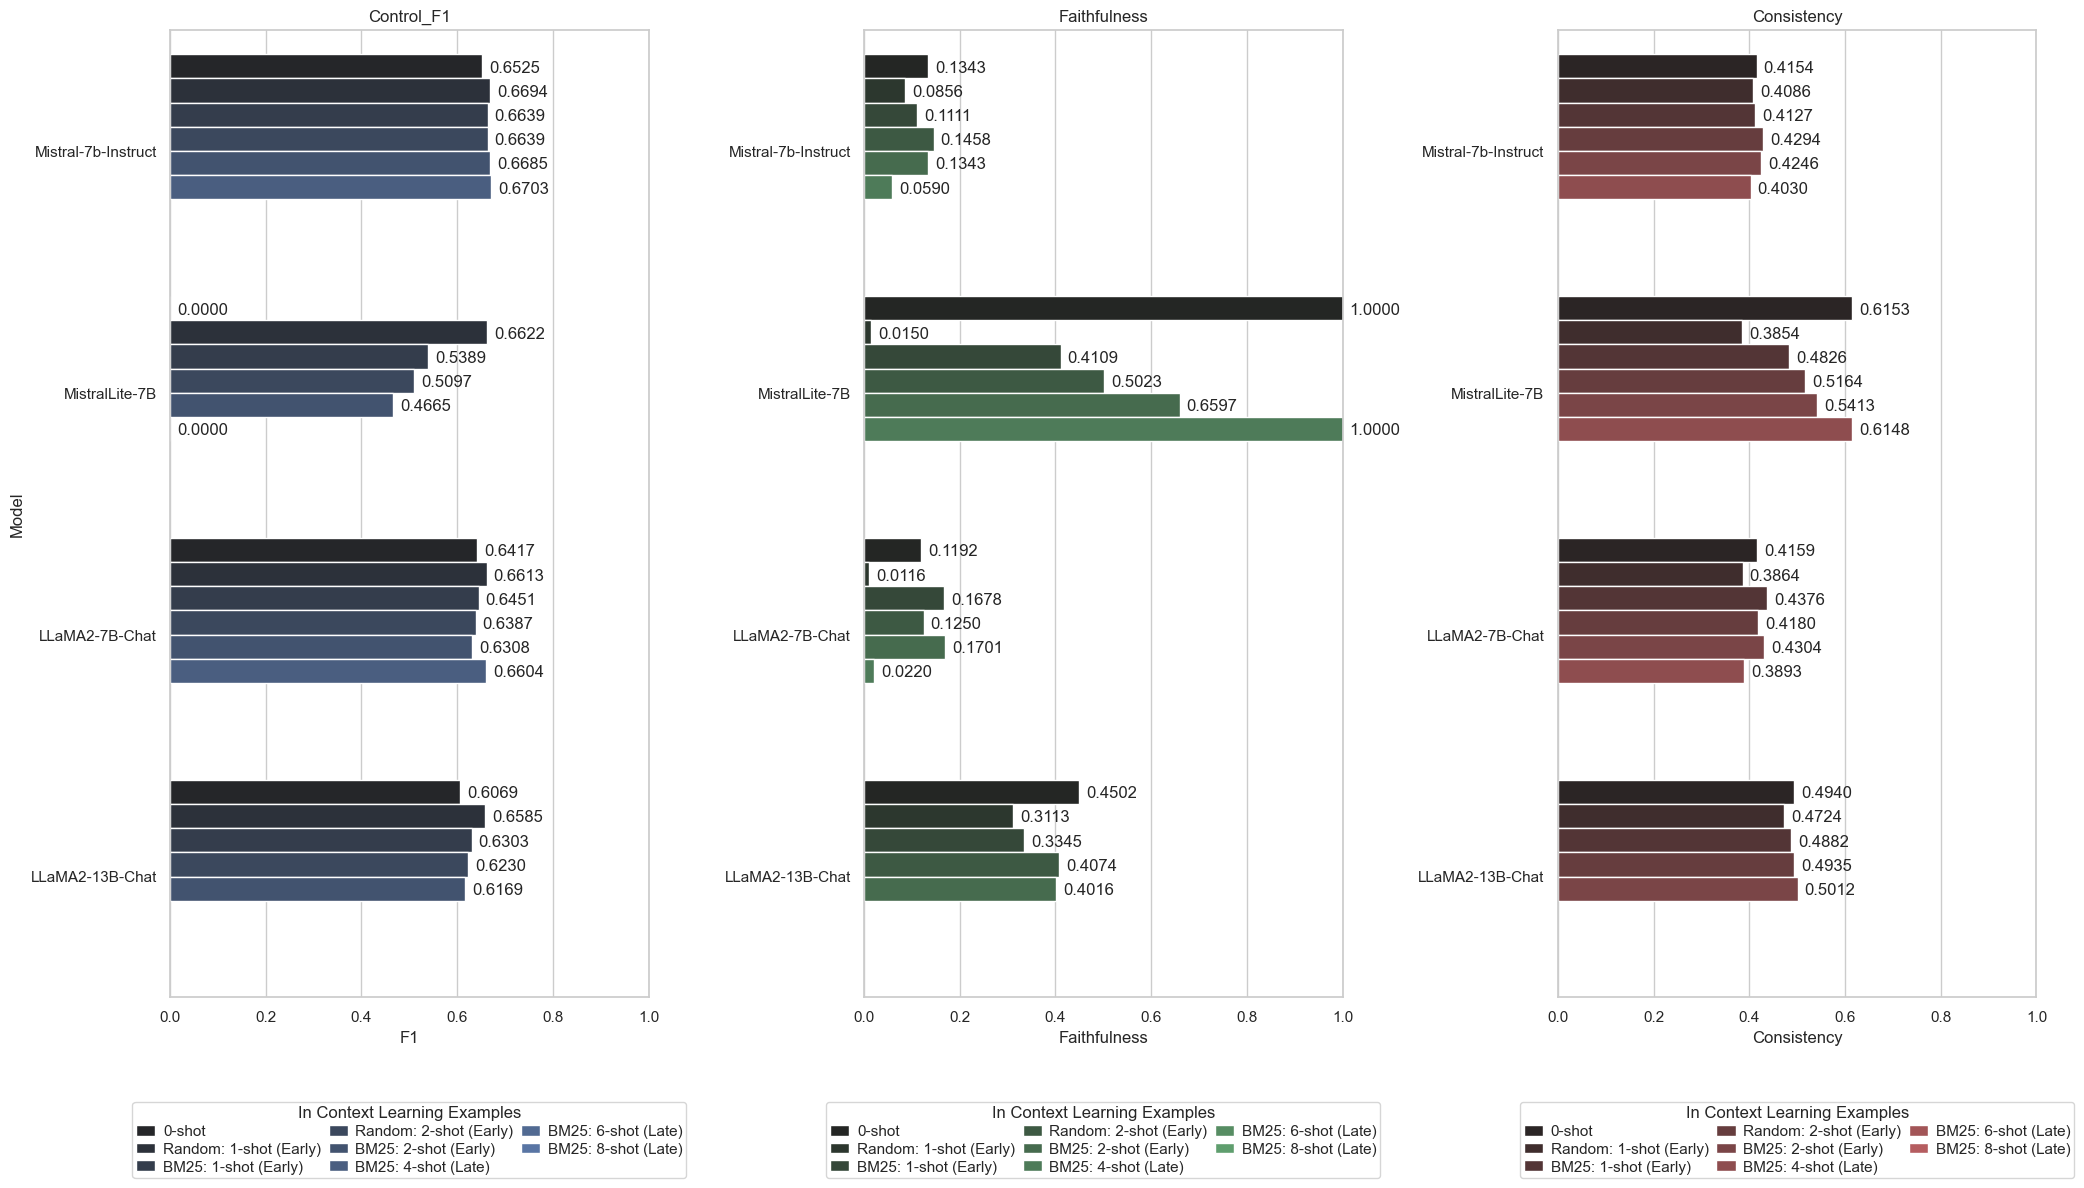

In [79]:
# model_order = ["Mistral-7b-Instruct", "MistralLite-7B", "LLaMA2-7B-Chat", "LLaMA2-13B-Chat"]
# df_rq21 = df[((df["k shot"] >= 0) & (df["k shot"] <= 6)) & ((df["Fusion Strategy"].isin(["Early", "Late"])) | df["Fusion Strategy"].isna()) & (df["Explicit Evidence"] == "no") & (df["CoT"] == "no") & (df["Fine tune"].isna()) & (df["Model"].isin(model_order))]

# df_rq21["In Context Learning Examples"] = df_rq21.apply(lambda row: f"{row['Retriever']}: {row['k shot']}-shot ({row['Fusion Strategy']})" if pd.notna(row['Retriever']) else f"{row['k shot']}-shot", axis=1)
# print(df_rq21["In Context Learning Examples"])

# df_rq21['Model'] = pd.Categorical(df_rq21['Model'], categories=model_order, ordered=True)
# icl_order = ["0-shot", "Random: 1-shot (Early)", "BM25: 1-shot (Early)", "Random: 2-shot (Early)", "BM25: 2-shot (Early)", "BM25: 4-shot (Late)", "BM25: 6-shot (Late)", "BM25: 8-shot (Late)"]
# df_rq21['In Context Learning Examples'] = pd.Categorical(df_rq21['In Context Learning Examples'], categories=icl_order, ordered=True)
# # print(df_rq21[["Model", "In Context Learning Examples", "Control_F1", "Faithfulness", "Consistency"]])

# # Create a figure with subplots
# fig, axs = plt.subplots(1, 3, figsize=(21, 12))

# # Plot Control_F1
# sns.barplot(x='Control_F1', y='Model', hue='In Context Learning Examples', data=df_rq21, ax=axs[0], orient='h', color="b")
# axs[0].set_title('Control_F1')
# axs[0].set_xlabel('F1')
# axs[0].set_ylabel('Model')
# axs[0].set_xlim(0, 1)

# # Plot Faithfulness
# sns.barplot(x='Faithfulness', y='Model', hue='In Context Learning Examples', data=df_rq21, ax=axs[1], orient='h', color="g")
# axs[1].set_title('Faithfulness')
# axs[1].set_xlabel('Faithfulness')
# axs[1].set_ylabel('')
# axs[1].set_xlim(0, 1)

# # Plot Consistency
# sns.barplot(x='Consistency', y='Model', hue='In Context Learning Examples', data=df_rq21, ax=axs[2], orient='h', color="r")
# axs[2].set_title('Consistency')
# axs[2].set_xlabel('Consistency')
# axs[2].set_ylabel('')
# axs[2].set_xlim(0, 1)

# # Display values outside the bar
# for ax in axs:
#     ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, handlelength=1.25, borderpad=0.25, labelspacing=0.25, columnspacing=0.5, handletextpad=0.5, title="In Context Learning Examples")
#     for p in ax.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_x() + width, p.get_y() + height * 3 / 4
#         if x == y == 0: continue
#         ax.annotate(f'{width:.4f}', (x, y), xytext=(5, 0), textcoords='offset points')

# plt.tight_layout()
# plt.show()

### RQ 2.3: Does coupling examples from different labels in ICL examples improve the performance of LLMs? (Late fusion vs Late coupled fusion)

### RQ 2.4 + RQ 2.5: Can Chain of Thoughts improve the performance of LLMs? Can Chain of Thoughts + ICL improve the performance of LLMs?

/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/955135086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21["Strategy"] = df_rq21.apply(lambda row: f"{row['k shot']}-shot{' + CoT' if row['CoT'] == 'yes' else ''}", axis=1)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/955135086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21['Model'] = pd.Categorical(df_rq21['Model'], categories=model_order, ordered=True)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn

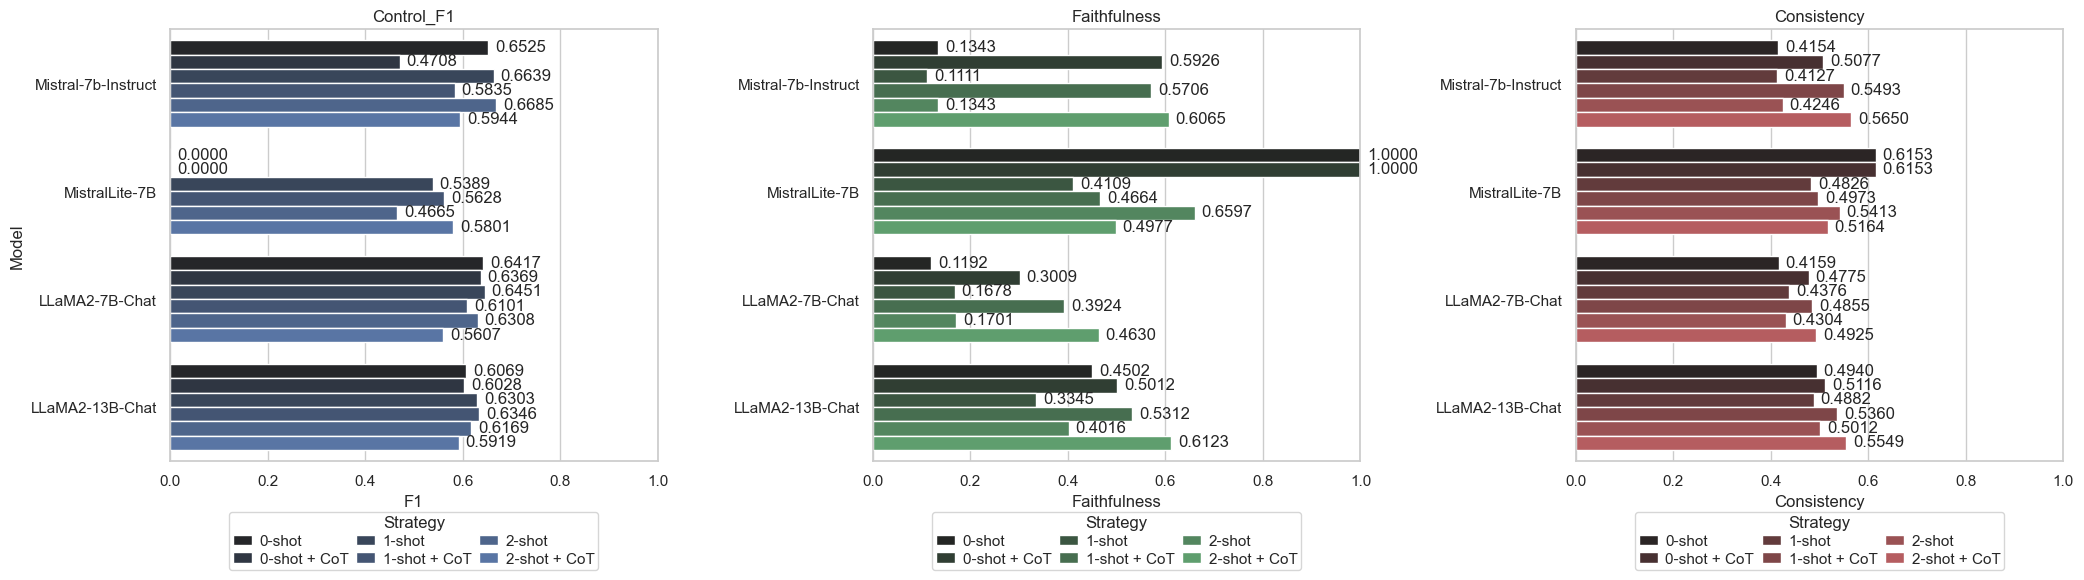

In [82]:
model_order = ["Mistral-7b-Instruct", "MistralLite-7B", "LLaMA2-7B-Chat", "LLaMA2-13B-Chat"]
df_rq24 = df[(df["k shot"] >= 0) & ((df["Fusion Strategy"] == "Early") | df["Fusion Strategy"].isna()) & (df["Explicit Evidence"] == "no") & (df["Fine tune"].isna()) & (df["Model"].isin(model_order)) & ((df["Retriever"].isna()) | (df["Retriever"] == "BM25"))]
df_rq24["Strategy"] = df_rq24.apply(lambda row: f"{row['k shot']}-shot{' + CoT' if row['CoT'] == 'yes' else ''}", axis=1)

df_rq24['Model'] = pd.Categorical(df_rq24['Model'], categories=model_order, ordered=True)
icl_order = ["0-shot", "0-shot + CoT", "1-shot", "1-shot + CoT", "2-shot", "2-shot + CoT"]
df_rq24['Strategy'] = pd.Categorical(df_rq24['Strategy'], categories=icl_order, ordered=True)

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot Control_F1
sns.barplot(x='Control_F1', y='Model', hue='Strategy', data=df_rq24, ax=axs[0], orient='h', color="b")
axs[0].set_title('Control_F1')
axs[0].set_xlabel('F1')
axs[0].set_ylabel('Model')
axs[0].set_xlim(0, 1)

# Plot Faithfulness
sns.barplot(x='Faithfulness', y='Model', hue='Strategy', data=df_rq24, ax=axs[1], orient='h', color="g")
axs[1].set_title('Faithfulness')
axs[1].set_xlabel('Faithfulness')
axs[1].set_ylabel('')
axs[1].set_xlim(0, 1)

# Plot Consistency
sns.barplot(x='Consistency', y='Model', hue='Strategy', data=df_rq24, ax=axs[2], orient='h', color="r")
axs[2].set_title('Consistency')
axs[2].set_xlabel('Consistency')
axs[2].set_ylabel('')
axs[2].set_xlim(0, 1)

# Display values outside the bar
for ax in axs:
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, handlelength=1.25, borderpad=0.25, labelspacing=0.25, columnspacing=0.5, handletextpad=0.5, title="Strategy")
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x() + width, p.get_y() + height * 3 / 4
        if x == y == 0: continue
        ax.annotate(f'{width:.4f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

### RQ 2.6: Can further explaining CT evidence improve the performance of LLMs?

/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/1664516996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21["Strategy"] = df_rq21.apply(lambda row: f"{row['k shot']}-shot{' + CoT' if row['CoT'] == 'yes' else ''}{' + Explicit' if row['Explicit Evidence'] == 'yes' else ''}", axis=1)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/1664516996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq21['Model'] = pd.Categorical(df_rq21['Model'], categories=model_order

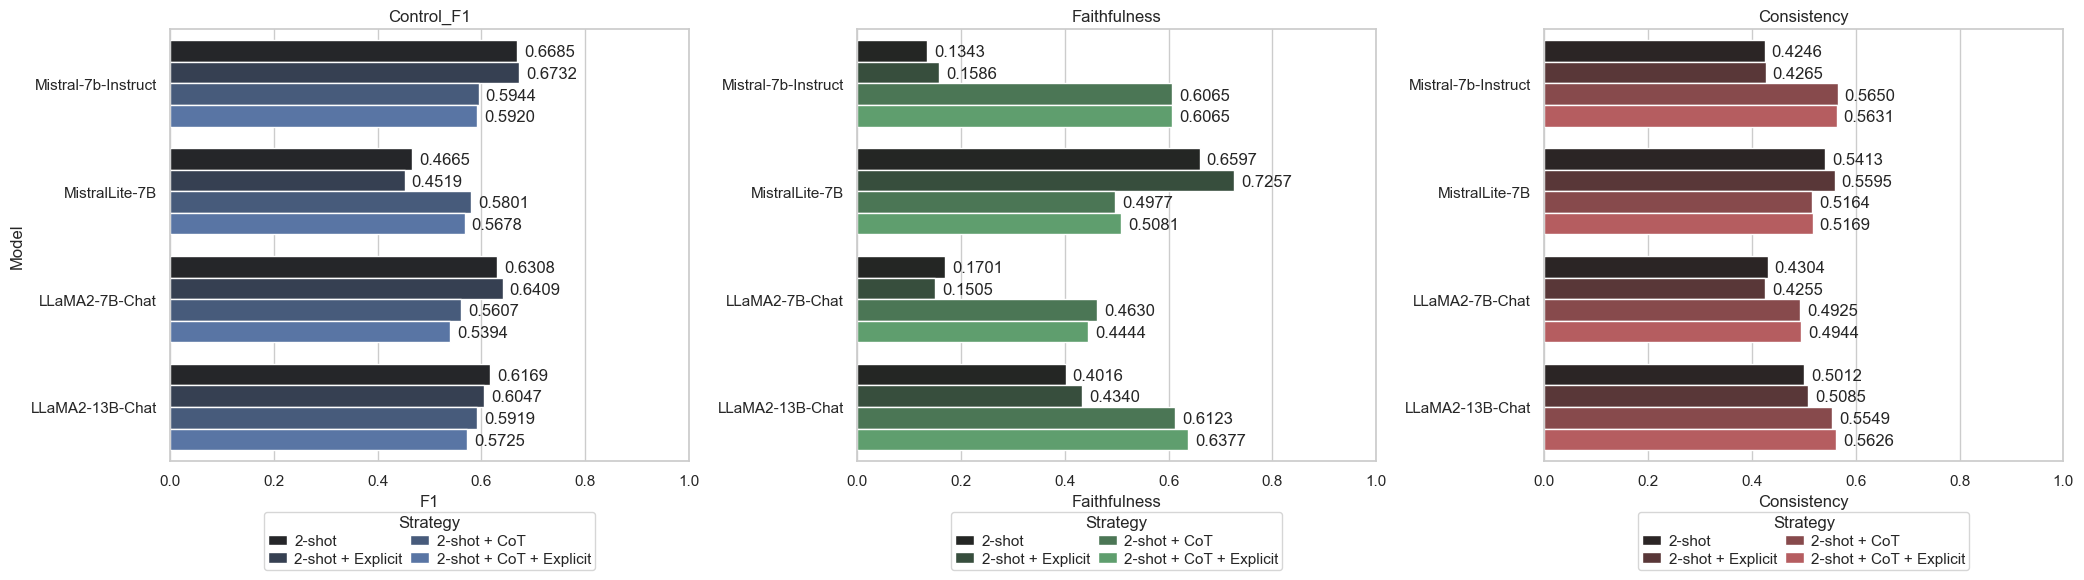

In [93]:
model_order = ["Mistral-7b-Instruct", "MistralLite-7B", "LLaMA2-7B-Chat", "LLaMA2-13B-Chat"]
df_rq26 = df[(df["k shot"] == 2) & ((df["Fusion Strategy"] == "Early") | df["Fusion Strategy"].isna()) & (df["Fine tune"].isna()) & (df["Model"].isin(model_order)) & ((df["Retriever"].isna()) | (df["Retriever"] == "BM25"))]
df_rq26["Strategy"] = df_rq26.apply(lambda row: f"{row['k shot']}-shot{' + CoT' if row['CoT'] == 'yes' else ''}{' + Explicit' if row['Explicit Evidence'] == 'yes' else ''}", axis=1)

df_rq26['Model'] = pd.Categorical(df_rq26['Model'], categories=model_order, ordered=True)
icl_order = [
    "2-shot",
    "2-shot + Explicit",
    "2-shot + CoT",
    "2-shot + CoT + Explicit",
]
df_rq26['Strategy'] = pd.Categorical(df_rq26['Strategy'], categories=icl_order, ordered=True)

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot Control_F1
sns.barplot(x='Control_F1', y='Model', hue='Strategy', data=df_rq26, ax=axs[0], orient='h', color="b")
axs[0].set_title('Control_F1')
axs[0].set_xlabel('F1')
axs[0].set_ylabel('Model')
axs[0].set_xlim(0, 1)

# Plot Faithfulness
sns.barplot(x='Faithfulness', y='Model', hue='Strategy', data=df_rq26, ax=axs[1], orient='h', color="g")
axs[1].set_title('Faithfulness')
axs[1].set_xlabel('Faithfulness')
axs[1].set_ylabel('')
axs[1].set_xlim(0, 1)

# Plot Consistency
sns.barplot(x='Consistency', y='Model', hue='Strategy', data=df_rq26, ax=axs[2], orient='h', color="r")
axs[2].set_title('Consistency')
axs[2].set_xlabel('Consistency')
axs[2].set_ylabel('')
axs[2].set_xlim(0, 1)

# Display values outside the bar
for ax in axs:
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, handlelength=1.25, borderpad=0.25, labelspacing=0.25, columnspacing=0.5, handletextpad=0.5, title="Strategy")
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x() + width, p.get_y() + height * 3 / 4
        if x == y == 0: continue
        ax.annotate(f'{width:.4f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

## RQ 3: Can relatively smaller LLMs compete with GPT-4 with fine-tuning?

### RQ 3.1: Can LoRA fine-tuning improve the performance of LLMs?

/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/318375358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq31['Model'] = pd.Categorical(df_rq31['Model'], categories=model_order, ordered=True)


   Fine tune Fine tune common adapter Fine tune section adapter  \
4        yes                     LoRA                       NaN   
5        yes                     LoRA                       NaN   
15       yes                     LoRA                       NaN   
16       yes                     LoRA                       NaN   
20       yes                     LoRA                       NaN   

   Fine tune triplet adapter Further fine tuned Merging CoT  k shot  \
4                        NaN                NaN  Single  no       0   
5                        NaN                NaN  Single  no       0   
15                       NaN                NaN  Single  no       0   
16                       NaN                NaN  Single  no       0   
20                       NaN                NaN  Single  no       0   

   Fusion Strategy Explicit Evidence  ... cont_Prec numerical_para_F1  \
4              NaN                no  ...         0          0.447761   
5              NaN      

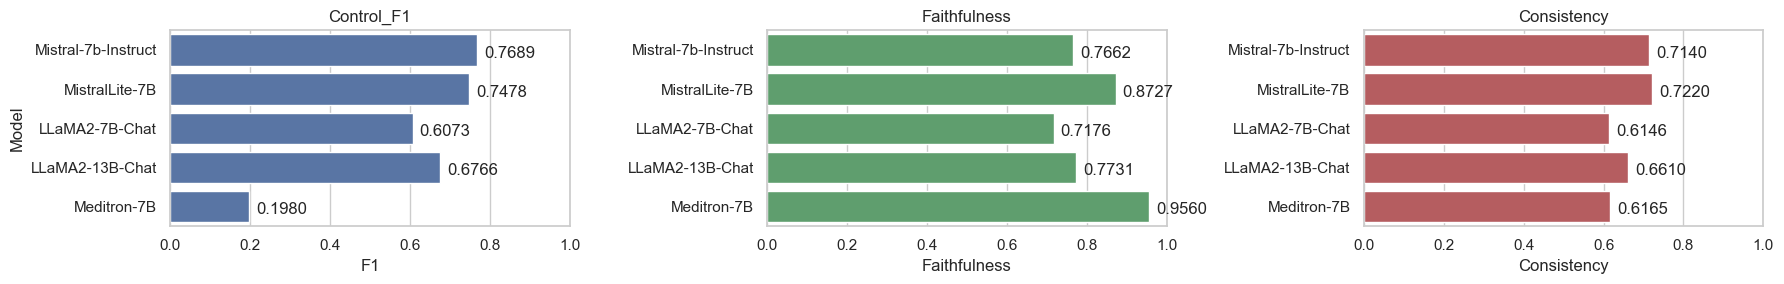

In [103]:
model_order = ["Mistral-7b-Instruct", "MistralLite-7B", "LLaMA2-7B-Chat", "LLaMA2-13B-Chat", "Meditron-7B"]
df_rq31 = df[(df["Fine tune"] == "yes") & (df["Model"].isin(model_order)) & (df["Fine tune common adapter"] == "LoRA") & (df["Fine tune section adapter"].isna()) & (df["Fine tune triplet adapter"].isna()) & (df["Further fine tuned"].isna()) & (df["Explicit Evidence"] == "no")]
df_rq31['Model'] = pd.Categorical(df_rq31['Model'], categories=model_order, ordered=True)
print(df_rq31)

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 3))

# Plot Control_F1
sns.barplot(x='Control_F1', y='Model', data=df_rq31, ax=axs[0], orient='h', color="b")
axs[0].set_title('Control_F1')
axs[0].set_xlabel('F1')
axs[0].set_ylabel('Model')
axs[0].set_xlim(0, 1)

# Plot Faithfulness
sns.barplot(x='Faithfulness', y='Model', data=df_rq31, ax=axs[1], orient='h', color="g")
axs[1].set_title('Faithfulness')
axs[1].set_xlabel('Faithfulness')
axs[1].set_ylabel('')
axs[1].set_xlim(0, 1)

# Plot Consistency
sns.barplot(x='Consistency', y='Model', data=df_rq31, ax=axs[2], orient='h', color="r")
axs[2].set_title('Consistency')
axs[2].set_xlabel('Consistency')
axs[2].set_ylabel('')
axs[2].set_xlim(0, 1)

# Display values outside the bar
for ax in axs:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x() + width, p.get_y() + height * 3 / 4
        if x == y == 0: continue
        ax.annotate(f'{width:.4f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

### RQ 3.2 + RQ 3.3: Can LoRA fine-tuning for each section improve the performance of LLMs? Can merging LoRA adapters improve the performance of LLMs?

/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/2929051113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq32['Model'] = pd.Categorical(df_rq32['Model'], categories=model_order, ordered=True)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/2929051113.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rq32["Fine Tuning Strategy"] = df_rq32.apply(lambda row: fine_tuning_strategy(row), axis=1)
/var/folders/_g/8c0sqh1x0fx739s775c7hh1h0000gn/T/ipykernel_35657/29290

['Single: Common (LoRA)', 'Uniform averaged: Common (LoRA), Triplet (LoRA)', 'Single: Common (Polytropon)', 'Single: Common (Polytropon)', 'Single: Common (LoRA)', 'Uniform averaged: Common (LoRA), Triplet (LoRA)', 'Uniform averaged: Common (LoRA), Section (LoRA), Triplet (LoRA)', 'Uniform averaged: Common (LoRA), Section (LoRA)', 'Uniform averaged: Common (LoRA), Section (LoRA), Triplet (LoRA)', 'Uniform averaged: Section (LoRA)', 'Single: Section (LoRA)', 'Uniform averaged: Common (LoRA), Section (LoRA)', 'Uniform averaged: Section (LoRA)', 'Single: Section (LoRA)']


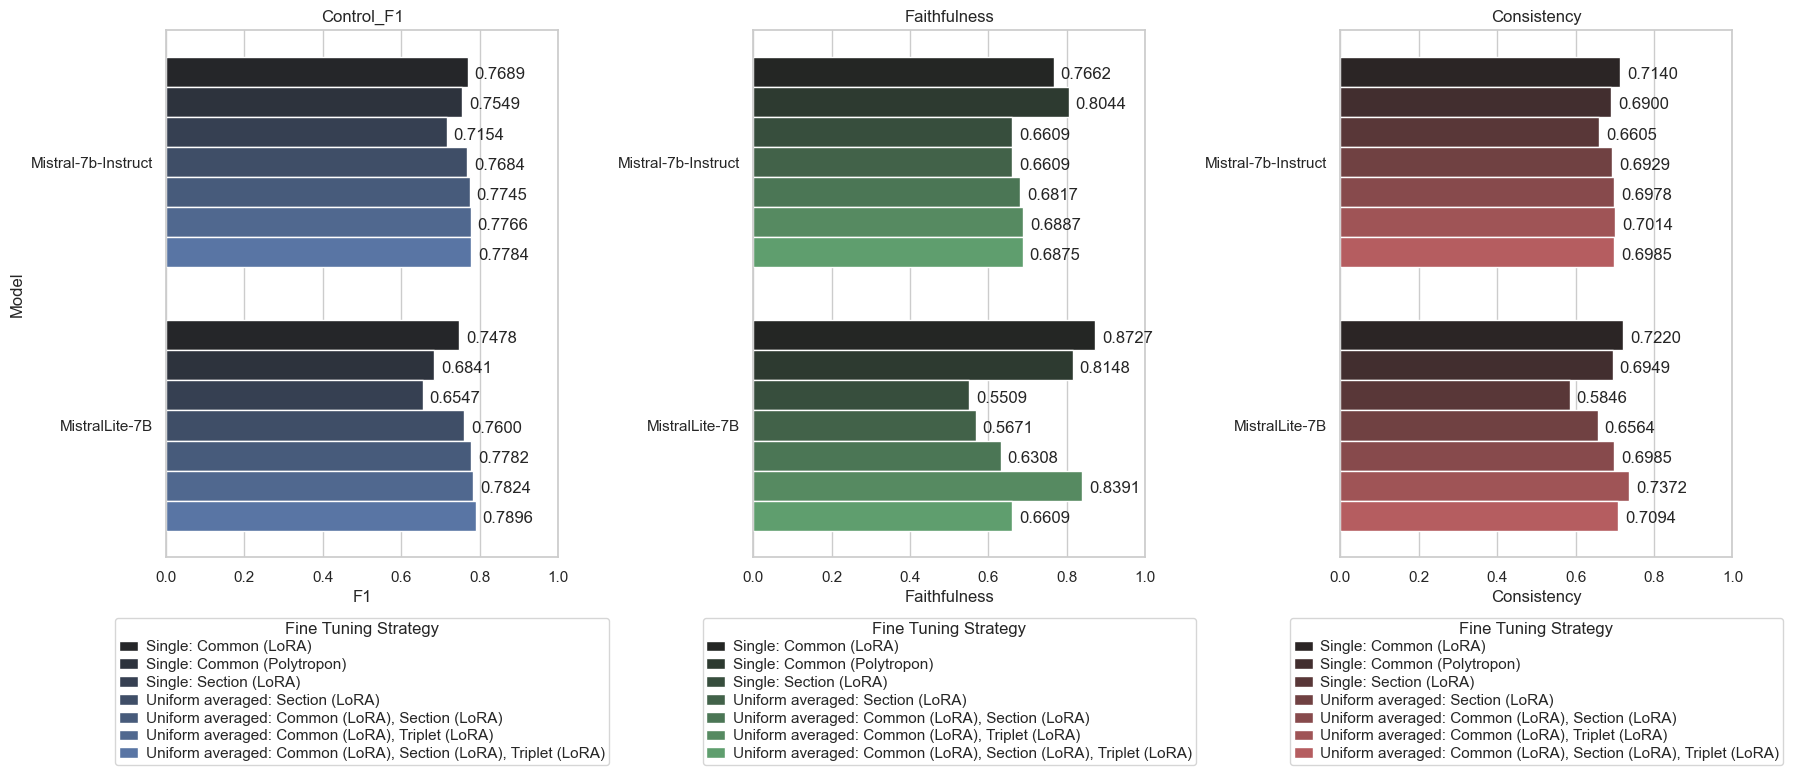

In [127]:
model_order = ["Mistral-7b-Instruct", "MistralLite-7B"]
df_rq32 = df[(df["Fine tune"] == "yes") & (df["Model"].isin(model_order)) & (df["Further fine tuned"].isna()) & (df["Explicit Evidence"] == "no") & (df["Further fine tuned"].isna()) & (~df["Merging"].fillna('').str.startswith("Weighted"))]
df_rq32['Model'] = pd.Categorical(df_rq32['Model'], categories=model_order, ordered=True)

def fine_tuning_strategy(row):
    ft_strategy = f"{row['Merging']}: "
    ft_strategies = []
    if pd.notna(row['Fine tune common adapter']):
        ft_strategies += [f"Common ({row['Fine tune common adapter']})"]
    if pd.notna(row['Fine tune section adapter']):
        ft_strategies += [f"Section ({row['Fine tune section adapter']})"]
    if pd.notna(row['Fine tune triplet adapter']):
        ft_strategies += [f"Triplet ({row['Fine tune triplet adapter']})"]

    ft_strategy += ", ".join(ft_strategies)
    return ft_strategy

df_rq32["Fine Tuning Strategy"] = df_rq32.apply(lambda row: fine_tuning_strategy(row), axis=1)
print(df_rq32["Fine Tuning Strategy"].tolist())
adapters_order = [
    'Single: Common (LoRA)',
    'Single: Common (Polytropon)',
    'Single: Section (LoRA)',
    'Uniform averaged: Section (LoRA)',
    'Uniform averaged: Common (LoRA), Section (LoRA)',
    'Uniform averaged: Common (LoRA), Triplet (LoRA)',
    'Uniform averaged: Common (LoRA), Section (LoRA), Triplet (LoRA)',
]
df_rq32['Fine Tuning Strategy'] = pd.Categorical(df_rq32['Fine Tuning Strategy'], categories=adapters_order, ordered=True)

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Plot Control_F1
sns.barplot(x='Control_F1', y='Model', hue='Fine Tuning Strategy', data=df_rq32, ax=axs[0], orient='h', color="b")
axs[0].set_title('Control_F1')
axs[0].set_xlabel('F1')
axs[0].set_ylabel('Model')
axs[0].set_xlim(0, 1)

# Plot Faithfulness
sns.barplot(x='Faithfulness', y='Model', hue='Fine Tuning Strategy', data=df_rq32, ax=axs[1], orient='h', color="g")
axs[1].set_title('Faithfulness')
axs[1].set_xlabel('Faithfulness')
axs[1].set_ylabel('')
axs[1].set_xlim(0, 1)

# Plot Consistency
sns.barplot(x='Consistency', y='Model', hue='Fine Tuning Strategy', data=df_rq32, ax=axs[2], orient='h', color="r")
axs[2].set_title('Consistency')
axs[2].set_xlabel('Consistency')
axs[2].set_ylabel('')
axs[2].set_xlim(0, 1)

# Display values outside the bar
for ax in axs:
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, handlelength=1.25, borderpad=0.25, labelspacing=0.25, columnspacing=0.5, handletextpad=0.5, title="Fine Tuning Strategy")
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_x() + width, p.get_y() + height * 3 / 4
        if x == y == 0: continue
        ax.annotate(f'{width:.4f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()